In [ ]:
import sys
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

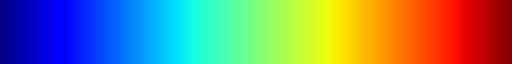

In [3]:
plt.cm.jet

In [9]:
[plt.cm.gist_ncar(v)[:3] for v in range(256)]

[(0.0, 0.0, 0.502),
 (0.0, 0.028619761630142255, 0.46510649750096117),
 (0.0, 0.05723952326028451, 0.42821299500192234),
 (0.0, 0.08585928489042677, 0.3913194925028835),
 (0.0, 0.11447904652056902, 0.35442599000384467),
 (0.0, 0.14309880815071127, 0.31753248750480584),
 (0.0, 0.17171856978085354, 0.280638985005767),
 (0.0, 0.2003383314109958, 0.24374548250672812),
 (0.0, 0.22895809304113804, 0.20685198000768934),
 (0.0, 0.2575778546712803, 0.1699584775086505),
 (0.0, 0.28619761630142254, 0.13306497500961167),
 (0.0, 0.3148173779315648, 0.09617147251057284),
 (0.0, 0.34343713956170707, 0.059277970011533954),
 (0.0, 0.3720569011918493, 0.02238446751249512),
 (0.0, 0.3457462695096253, 0.0870866880085368),
 (0.0, 0.3191596057002035, 0.15229943977591043),
 (0.0, 0.29257294189078176, 0.21751219154328405),
 (0.0, 0.26598627808136, 0.2827249433106577),
 (0.0, 0.23939961427193826, 0.3479376950780313),
 (0.0, 0.2128129504625165, 0.41315044684540486),
 (0.0, 0.1862262866530947, 0.4783631986127785

In [ ]:
colors = np.array([[plt.cm.gist_ncar(v)[:3] for v in range(255)]] * 100)

array([[[0.        , 0.        , 0.502     ],
        [0.        , 0.02861976, 0.4651065 ],
        [0.        , 0.05723952, 0.428213  ],
        ...,
        [0.9877263 , 0.91800173, 0.9889489 ],
        [0.99051753, 0.93616782, 0.9913326 ],
        [0.99330877, 0.95433391, 0.9937163 ]],

       [[0.        , 0.        , 0.502     ],
        [0.        , 0.02861976, 0.4651065 ],
        [0.        , 0.05723952, 0.428213  ],
        ...,
        [0.9877263 , 0.91800173, 0.9889489 ],
        [0.99051753, 0.93616782, 0.9913326 ],
        [0.99330877, 0.95433391, 0.9937163 ]],

       [[0.        , 0.        , 0.502     ],
        [0.        , 0.02861976, 0.4651065 ],
        [0.        , 0.05723952, 0.428213  ],
        ...,
        [0.9877263 , 0.91800173, 0.9889489 ],
        [0.99051753, 0.93616782, 0.9913326 ],
        [0.99330877, 0.95433391, 0.9937163 ]],

       ...,

       [[0.        , 0.        , 0.502     ],
        [0.        , 0.02861976, 0.4651065 ],
        [0.        , 0

In [16]:
gdf = gpd.read_file('vnmap/vn_shp/vn.shp', encoding='utf-8').drop("id", axis=1)

In [17]:
df = pd.read_csv("data/region/vietnam/cities.csv")

In [35]:
aaa = pd.read_csv("forecast/weather/1704000203.csv")

In [39]:
type(aaa["time"][0])

str

In [18]:
df = gpd.GeoDataFrame(df.loc[:, ["admin_name", "id"]])

In [ ]:
join_df = gdf.merge(df, right_on="admin_name", left_on="name")

In [20]:
db = {i: pd.read_csv("forecast/weather/" + str(i) + ".csv").set_index("time") for i in join_df["id"]}

In [21]:
sample_time = db[1704495953].index[10]
sample_time

'2024-12-07T10:00'

In [22]:
temp = [db[i].loc[sample_time, "temperature_2m"] for i in join_df["id"]]

In [23]:
temp_df = pd.DataFrame({"temperature_2m": temp, "id": join_df["id"]})

In [24]:
temp_df

,temperature_2m,id
0,29.7,1704774326
1,18.6,1704413791
2,22.6,1704000623
3,29.6,1704783472
4,29.8,1704863046
...,...,...
58,19.4,1704495953
59,17.3,1704000217
60,20.1,1704983526
61,25.6,1704988146


In [25]:
join_df = join_df.merge(temp_df, on="id")

In [26]:
color_func = lambda r, g, b: "#%02x%02x%02x" % (int(r * 255), int(g * 255), int(b * 255))

In [27]:
colors = [plt.cm.gist_ncar(v)[:3] for v in range(255)][110:210]

In [28]:
join_df = gpd.GeoDataFrame(join_df)

In [29]:
join_df["color"] = [color_func(*colors[round(t * 4.5 - 40)]) for t in temp]

In [31]:
join_df

geopandas.geodataframe.GeoDataFrame

In [17]:
app = QApplication(sys.argv)
main_window = MapApp(join_df)
main_window.show()
sys.exit(app.exec_())

SystemExit: 0

c:\Users\trann\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
